# 회귀
- 소득이 증가하면 소비가 증가, 어떤 변수가 다른 변수에 영향을 준다면 두 변수 사이에 선형관계가 있다고 할 수 있음.
- 두 변수 사이에 일대일로 대응되는 확률적, 통계적 상관성으로 찾는 알고리즘을 Simple Linear Regression이라고 함.
- 변수 X,Y에 대한 정보를 가지고 일차 방정식의 계수 a,b를 찾는 과정이 단순회귀분석 알고리즘



## 회귀 평가 지표:
- MAE : 실제값과 예측값의 차이를 절대값으로 변환해 평균한것
- MSE : 실제값과 예측값의 차이를 제곱해 평균한 것
- RMSE : MSE에 루트를 씌운 것 ( 실제 오류 평균보다 커지는 것을 보정 )
- R square : 분산 기반으로 예측 성능을 평가, 실제값의 분산 대비 예측값의 분산 비율을 지표로 함
- 1에 가까울 수록 예측 정확도가 높음, 예측값 Variance / 실제값 Variance

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
ls

auto-mpg.xlsx  sample_data/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [5]:
df= pd.read_excel('./auto-mpg.xlsx')
ndf=df[['mpg','cylinders','horsepower','weight']]
ndf.horsepower[ndf.horsepower == '?'] = np.nan 
ndf.dropna(subset=['horsepower'],axis=0,inplace=True)
ndf.convert_dtypes()

,mpg,cylinders,horsepower,weight
0,18.0,8,130,3504
1,15.0,8,165,3693
2,18.0,8,150,3436
3,16.0,8,150,3433
4,17.0,8,140,3449
...,...,...,...,...
393,27.0,4,86,2790
394,44.0,4,52,2130
395,32.0,4,84,2295
396,28.0,4,79,2625


In [ ]:
ndf.to_pickle('./dataset/auto-mpg.pkl')

In [ ]:
from sklearn.model_selection import train_test_split
X=ndf[['weight']]
y=ndf['mpg']

X_train,X_test,y_train,y_test = train_test_split(X,
                                                 y,
                                                test_size=0.3,
                                                random_state=11)

<AxesSubplot:title={'center':'Regplot'}, xlabel='weight', ylabel='mpg'>

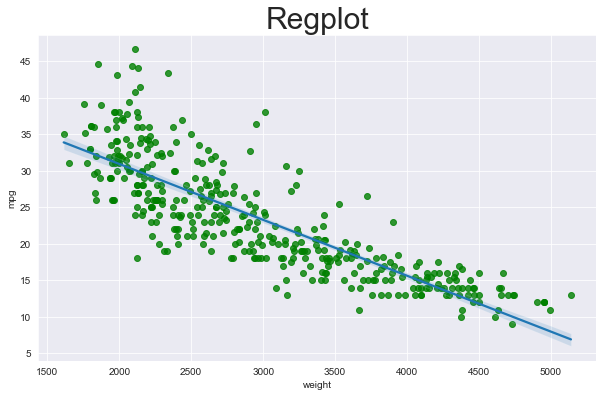

In [ ]:
sns.set_style('darkgrid')
fig,axes = plt.subplots(1,1,figsize=(10,6))
plt.title('Regplot',fontsize=30)
sns.regplot(x='weight',y='mpg',data=ndf,scatter_kws={'color':'green'})


In [ ]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)
y_preds = lr.predict(X_test)

In [ ]:
print('기울기 : ',lr.coef_)
print('절편 : ',lr.intercept_)
#X_test
#y_preds

기울기 :  [-0.00762163]
절편 :  45.97121770475769


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test,y_preds)
rmse=np.sqrt(mse)
r_square = r2_score(y_test,y_preds)
print(f'mse : {mse}, rmse : {rmse}, r_square : {r_square}')

mse : 22.168955157340807, rmse : 4.70839199274453, r_square : 0.6410608728212728


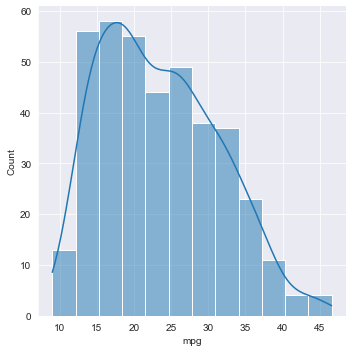

In [ ]:
sns.displot(y,kde=True)

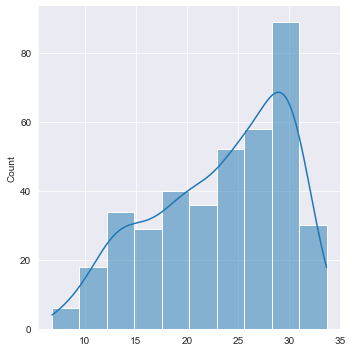

In [ ]:
y_hat = lr.predict(X)
sns.displot(y_hat,kde=True)

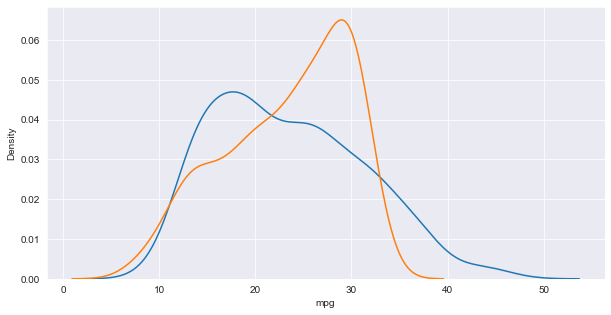

In [ ]:
plt.figure(figsize=(10,5))
ax1=sns.distplot(y,hist=False,label='y')
ax2=sns.distplot(y_hat,hist=False,label='y_hat')

## 다항 희귀 분석
- 직선보다 곡선으로 설명하는 것이 적합할 경우 다항 함수를 사용하면 복잡한 곡선 형태의 회귀선을 표현할 수 있음
- 2차 함수 이상의 다항 함수를 이용하여 두 변수간의 선형관계를 설명하는 알고리즘
- 다항회귀도 선형회귀임, 선형/비선형 회귀를 나누는 기준은 회귀계수가 선형/비선형인지에 따르며 독립변수의 선형/비선형 여부와는 무관

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)

print(X_train.shape)
print(X_train_poly.shape)

(274, 1)
(274, 3)


In [ ]:
X_train_poly[:5]

array([[1.0000000e+00, 2.1200000e+03, 4.4944000e+06],
       [1.0000000e+00, 4.4990000e+03, 2.0241001e+07],
       [1.0000000e+00, 1.8450000e+03, 3.4040250e+06],
       [1.0000000e+00, 2.0450000e+03, 4.1820250e+06],
       [1.0000000e+00, 1.9850000e+03, 3.9402250e+06]])

In [ ]:
# 차수 확인
poly.get_feature_names()

['1', 'x0', 'x0^2']

In [ ]:
pr=LinearRegression()
pr.fit(X_train_poly,y_train)
X_test_poly = poly.fit_transform(X_test)
r_square = pr.score(X_test_poly,y_test)
r_square

0.6368479947376222

In [ ]:
print(pr.coef_)
print(pr.intercept_)

[ 0.00000000e+00 -2.06207232e-02  2.03618732e-06]
65.12274142723444


Text(0, 0.5, 'mpg')

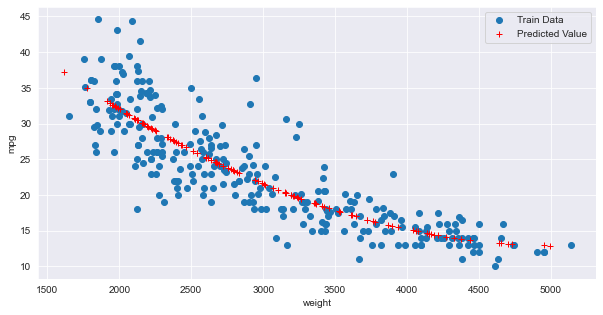

In [ ]:
y_hat_test = pr.predict(X_test_poly)
fig=plt.figure(figsize=(10,5))
ax=fig.add_subplot(1,1,1)
ax.plot(X_train,y_train,'o',label='Train Data')
ax.plot(X_test,y_hat_test,'r+',label='Predicted Value')
ax.legend(loc='best')
plt.xlabel('weight')
plt.ylabel('mpg')

In [ ]:
#[과제] X데이터를 X_poly 데이터셋을 변환하여 2차 함수로 만들어진 데이터셋을 예측하고 시각화 하세요.
# 0~1 사이의 균일분포
import numpy as np
np.random.seed(42)
m=100
X=6*np.random.rand(m,1)-3
y=0.5*X**2+X+2+np.random.randn(m,1)

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_ , lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

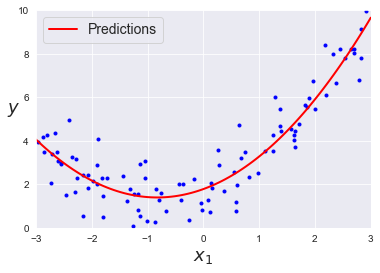

In [ ]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()

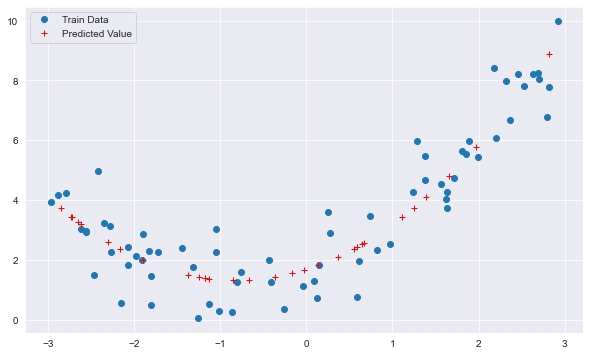

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state = 11)
# 2차 다항식으로 바꿈
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)
# 훈련 및 학습
lr = LinearRegression()
lr.fit(X_train_poly,y_train)
y_preds = lr.predict(X_test_poly)
# 시각화
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1,1,1)
ax.plot(X_train,y_train,'o',label='Train Data')
ax.plot(X_test,y_preds,'r+', label='Predicted Value')
ax.legend(loc='best')
plt.show()
plt.close()


In [ ]:
poly.get_feature_names()

['1', 'x0', 'x0^2']

## 다중 회귀분석
- 여러 개의 독립변수가 종속변수에 영향을 주고 선형관계를 갖는 경우에 다중 회귀분석을 사용
- 다중 회귀분석 알고리즘은 각 독립변수의 계수와 상수항에 적절한 값들을 찾아서 모형을 완성

In [ ]:
df=pd.read_pickle('./dataset/auto-mpg.pkl')
df

,mpg,cylinders,horsepower,weight
0,18.0,8,130,3504
1,15.0,8,165,3693
2,18.0,8,150,3436
3,16.0,8,150,3433
4,17.0,8,140,3449
...,...,...,...,...
393,27.0,4,86,2790
394,44.0,4,52,2130
395,32.0,4,84,2295
396,28.0,4,79,2625


In [ ]:
X=df.drop('mpg',axis=1)
y=df['mpg']
X.shape

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state = 10)

lr=LinearRegression()
lr.fit(X_train,y_train)
y_preds = lr.predict(X_test)
r_square = lr.score(X_test,y_test)
r_square

0.6939048496695599

In [ ]:
#mse,rmse,r2_score
print('기울기 : ',lr.coef_)
print('절편 : ',lr.intercept_)
mse = mean_squared_error(y_test,y_preds)
rmse=np.sqrt(mse)
r_square = r2_score(y_test,y_preds)
print(f'mse : {mse}, rmse : {rmse}, r_square : {r_square}')

기울기 :  [-0.60691288 -0.03714088 -0.00522268]
절편 :  46.414351269634025
mse : 17.33008562898995, rmse : 4.16294194398504, r_square : 0.6939048496695599


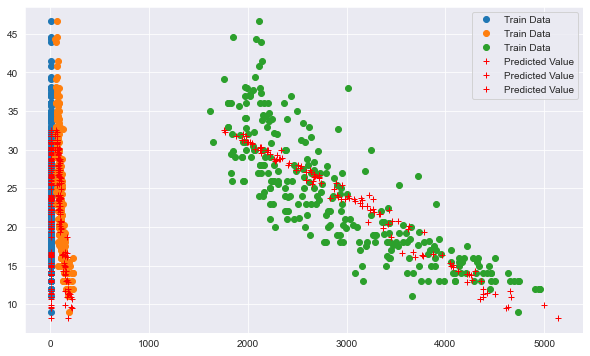

In [ ]:
#[과제] y_test, y_hat 을 하나의 그래프로 비교하여 시각화
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1,1,1)
ax.plot(X_train,y_train,'o',label='Train Data')
ax.plot(X_test,y_preds,'r+', label='Predicted Value')
ax.legend(loc='best')
plt.show()
plt.close()


38     14.0
172    25.0
277    16.2
196    24.5
357    32.9
       ... 
375    36.0
322    46.6
15     22.0
127    19.0
267    27.5
Name: mpg, Length: 274, dtype: float64

In [ ]:
[과제] 아래 Boston 데이터 셋으로 보스턴 주택 가격 예측 모델을 만들고 평가하세요.

In [6]:
import pandas as pd
from sklearn.datasets import load_boston
boston = load_boston()
boston_df = pd.DataFrame(boston.data,columns=boston.feature_names)
boston_df['PRICE'] = boston.target
boston_df

#CRIM 자치시(town) 별 1인당 범죄율
#ZN 25,000 평방피트를 초과하는 거주지역의 비율
#INDUS 비소매상업지역이 점유하고 있는 토지의 비율
#CHAS 찰스강에 대한 더미변수(강의 경계에 위치한 경우는 1, 아니면 0)
#NOX 10ppm 당 농축 일산화질소
#RM 주택 1가구당 평균 방의 개수
#AGE 1940년 이전에 건축된 소유주택의 비율
#DIS 5개의 보스턴 직업센터까지의 접근성 지수
#RAD 방사형 도로까지의 접근성 지수
#TAX 10,000 달러 당 재산세율
#PTRATIO 자치시(town)별 학생/교사 비율
#B 1000(Bk-0.63)^2, 여기서 Bk는 자치시별 흑인의 비율을 말함.
#LSTAT 모집단의 하위계층의 비율(%)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


<AxesSubplot:>

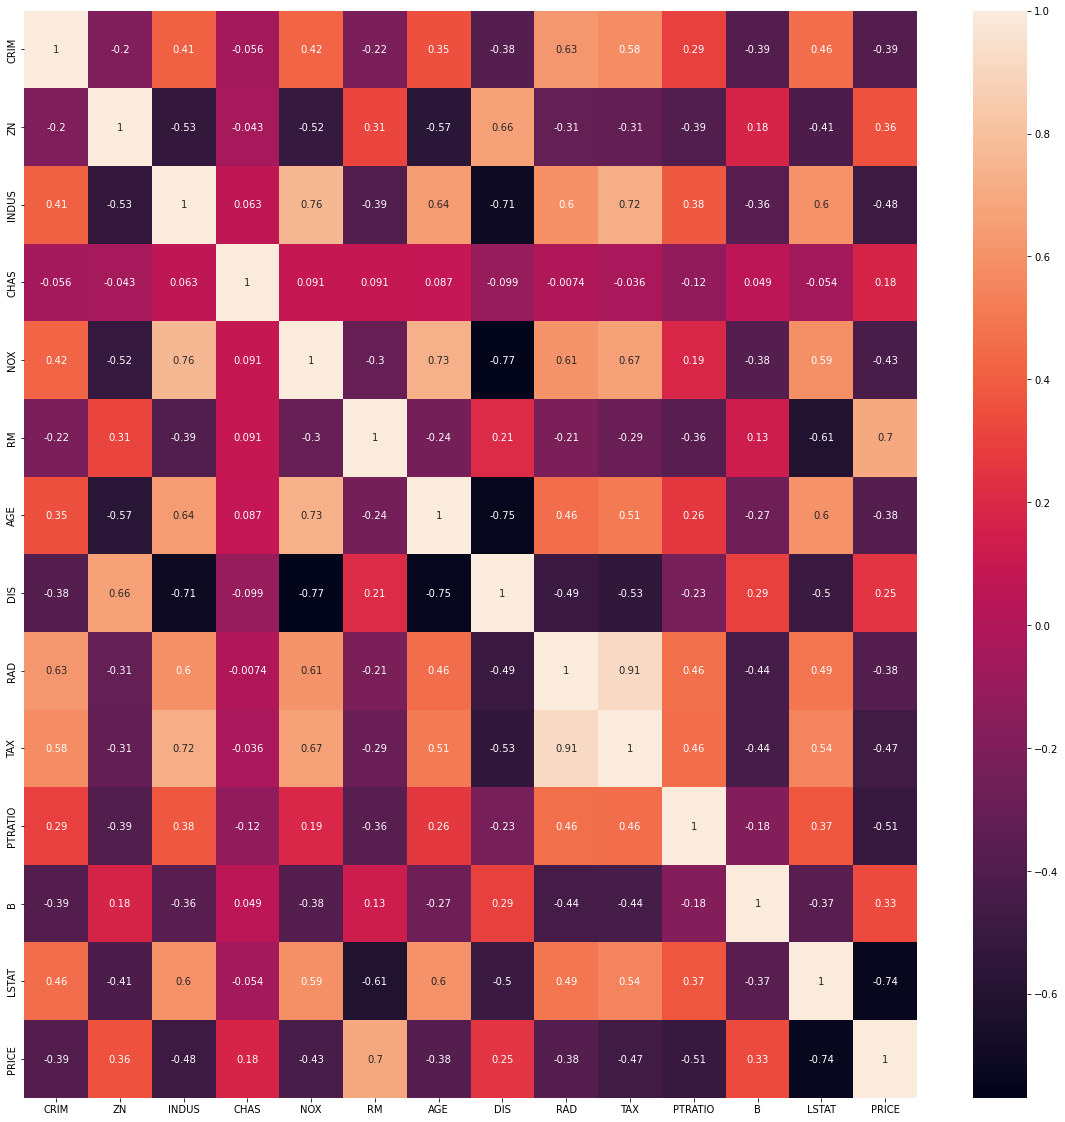

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

hc = boston_df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(hc,annot=True)

<AxesSubplot:xlabel='PRICE', ylabel='Density'>

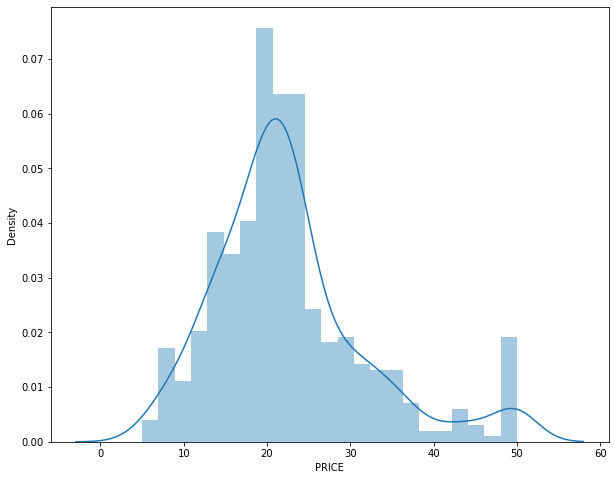

In [9]:
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(10,8))
sns.distplot(boston_df.PRICE)

<AxesSubplot:xlabel='PRICE', ylabel='Density'>

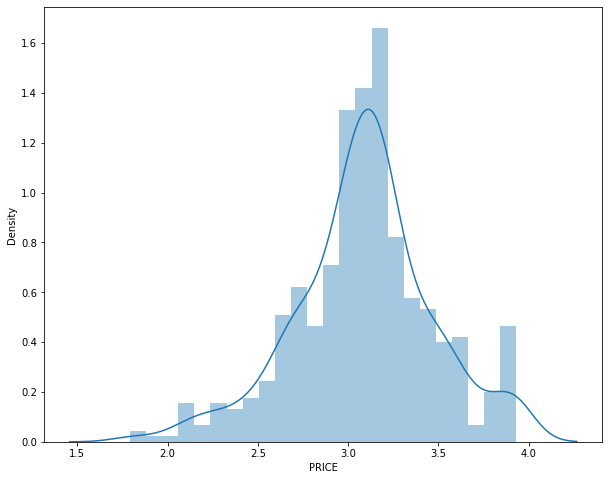

In [10]:
import numpy as np
plt.figure(figsize=(10,8))
y_log=np.log1p(boston_df['PRICE'])
sns.distplot(y_log)

In [11]:
# 변수 선택 및 로그 변환후 모델링 및 평가
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
X=boston_df[['RM','ZN','INDUS','NOX','AGE','PTRATIO','LSTAT','RAD']]
y=boston_df['PRICE']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
r2=r2_score(y_test,y_pred)
print(f'MSE : {mse:.3f} ,RMSE : {rmse:.3f}, R2 Score : {r2:.3f}')

MSE : 25.934 ,RMSE : 5.093, R2 Score : 0.717


In [12]:
print(f'절편값 : {lr.intercept_:.3f}, 회귀 계수값 : {np.round(lr.coef_,1)}')

절편값 : 36.903, 회귀 계수값 : [  3.2  -0.    0.1 -14.7   0.   -1.2  -0.6   0.1]


# 규제 선형 모델 - 릿지, 라쏘, 엘라스틱넷
- 회귀 모델은 적절히 데이터에 적합하면서도 회귀 계수가 기하급수적으로 커지는 것을 제어할 필요가 있음
- 선형 모형의 비용함수는 RSS(실제 값과 예측값의 차이)를 최소화하는 것만 고려한 결과 테스트 데이터 세트 예측 성능 저하 초래
- RSS 최소화 방법과 과적합을 방지하기 위해 회귀 계수 값이 커지지 않도록 하는 방법이 서로 균형을 이루게 해야 함(최적모델을 위한 Cost 함수 구성요소 = 학습데이터 잔차 오류 최소화 + 회귀계수 크기 제어)
- 회귀 계수 값의 크기를 조절하기 위하여 비용 함수에 알파 값으로 패널티를 부여해 과적합을 개선하는 방식을 규제라고 함
- alpha값을 크게 하면 비용 함수는 회귀 계수 W의 값을 작게 해 과적합을 개선할 수 있으며 alpha값을 작게 하면 회귀 계수 W의 값이 커져도 어느정도 상쇄가 가능하므로 학습데이터 적합을 더 개선
- 비용함수에 alpha값으로 패널티를 부여해 회귀 계수 값의 크기를 감소시켜 과적합을 개선하는 방식을 규제라고 한다.
- 규제는 크게 L2 방식과 L1 방식으로 구분되며 전자를 적용한 회귀를 릿지, 후자를 적용한 것이 라쏘임
- L2는 W의 제곱에 패널티를 부여하며 L1은 W의 절댓값에 패널티 부여
- 엘리스틱넷 회귀는 L2 규제와 L1 규제를 결합한 회귀
l1 라소 l2 릿지

희귀계수를 작게
작은걸 0

In [13]:
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

ridge = Ridge(alpha=10)
neg_mse_scores = cross_val_score(ridge,X,y,scoring='neg_mean_squared_error',cv=5)
rmse_scores = np.sqrt(-1*neg_mse_scores)
avg_rmse=np.mean(rmse_scores)

In [14]:
print(f'rmse score {np.round(rmse_scores,3)}')
print(f'평균 : {np.round(avg_rmse,3)}')

rmse score [3.216 5.405 6.227 9.091 5.8  ]
평균 : 5.948


In [15]:
alphas = [0,0.1,1,10,100]

for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    neg_mse_scores = cross_val_score(ridge,X,y,scoring='neg_mean_squared_error',cv=5)
    rmse_scores = np.sqrt(-1*neg_mse_scores)
    avg_rmse=np.mean(rmse_scores)
    print(f'rmse score {np.round(rmse_scores,3)}')
    print(f'평균 : {np.round(avg_rmse,3)}')

rmse score [3.403 5.226 6.225 9.466 5.937]
평균 : 6.051
rmse score [3.382 5.23  6.216 9.46  5.934]
평균 : 6.044
rmse score [3.282 5.273 6.176 9.418 5.918]
평균 : 6.013
rmse score [3.216 5.405 6.227 9.091 5.8  ]
평균 : 5.948
rmse score [3.516 5.747 6.751 7.802 5.239]
평균 : 5.811


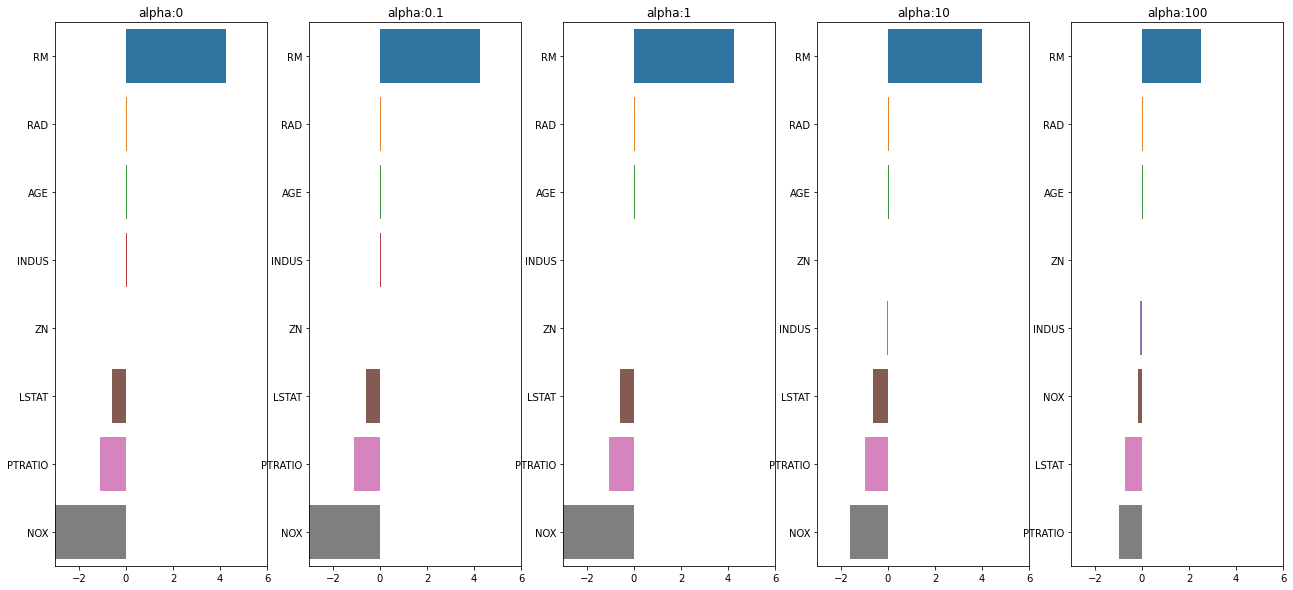

In [16]:
# 상기의 경우 알파값이 증가하면 희귀계수가 지속적으로 작아지는 것을 시각화 하여 설명하세요.
import pandas as pd
fig,axs=plt.subplots(figsize=(22,10),nrows=1,ncols=5)
coeff_df=pd.DataFrame()
for pos, alpha in enumerate(alphas):
    ridge = Ridge(alpha=alpha)
    ridge.fit(X,y)
    coeff=pd.Series(data=ridge.coef_,index=X.columns)
    colname='alpha:'+str(alpha)
    coeff_df[colname]=coeff
    coeff =coeff.sort_values(ascending=False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3,6)
    sns.barplot(x=coeff.values,y=coeff.index,ax=axs[pos])

In [17]:
# alpha 값이 증가하면 회귀계수가 지속적으로 작아지는 것을 시각화하여 설명하세요

X = boston_df[['RM', 'ZN', 'INDUS', 'NOX', 'AGE', 'PTRATIO', 'LSTAT', 'RAD']]
y = boston_df['PRICE']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

alphas = np.arange(0, 3000, 0.1)

Y = [[], [], [], [], [], [], [], []]
for j, k in enumerate(X.columns):
    for i in alphas:
        ridge = Ridge(alpha = i, random_state = 44)
        ridge.fit(X_train, y_train)
        coef = pd.Series(data = np.round(ridge.coef_, 3), index = X.columns)
        Y[j].append(coef[k])

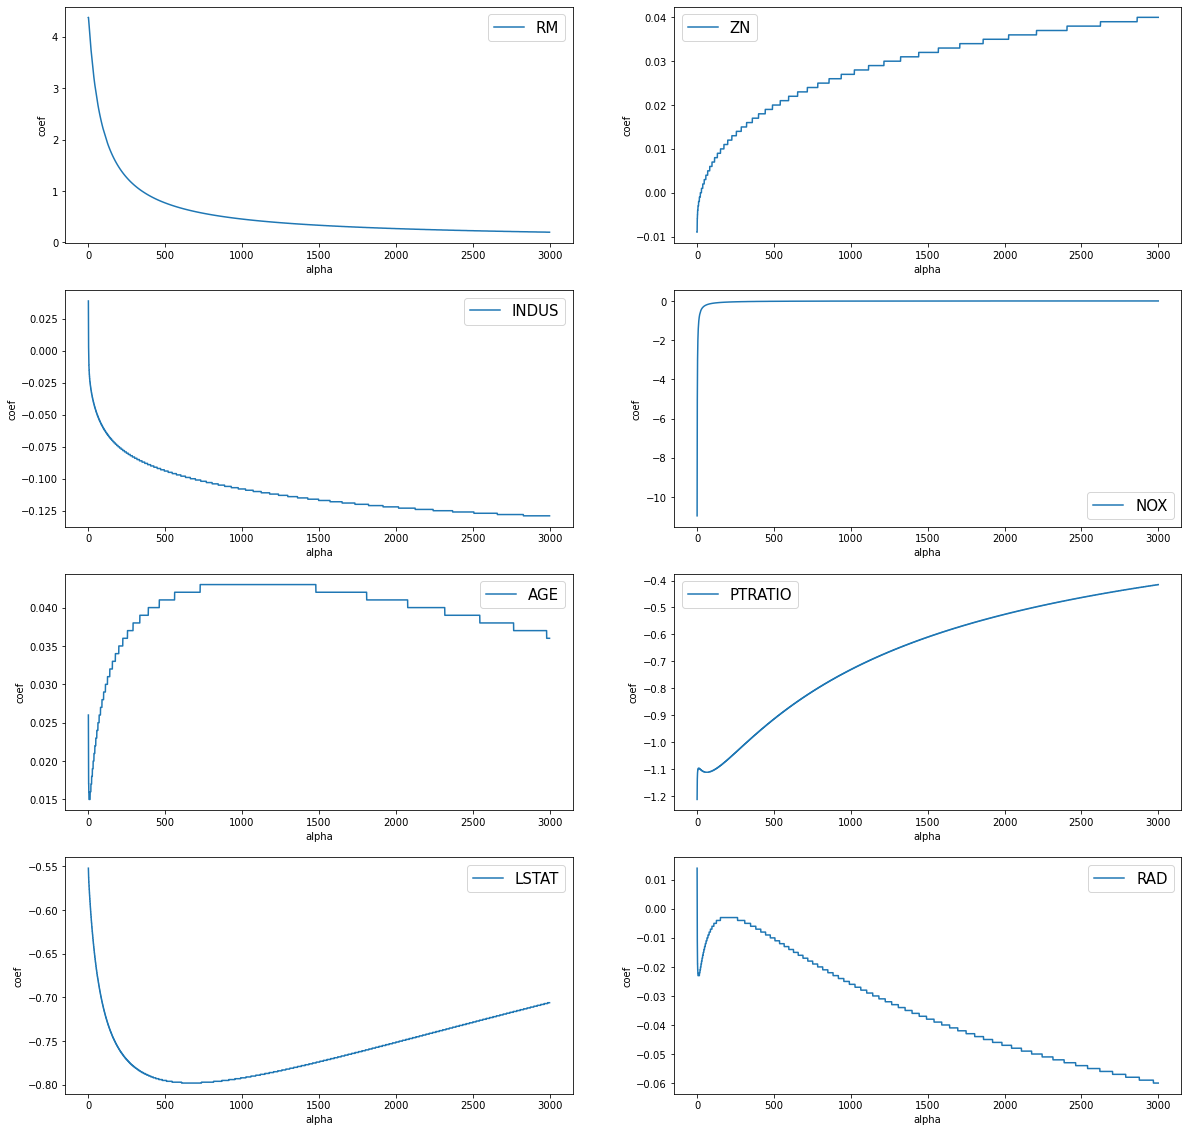

In [18]:
fig = plt.figure(figsize = (20, 20))
for i, j, k in zip(range(len(X.columns)), Y, X.columns):
    ax = fig.add_subplot(4, 2, i+1)
    plt.plot(alphas, j, label = k)
    plt.xlabel('alpha')
    plt.ylabel('coef')
    plt.legend(fontsize = 15)

[과제] 모델이름과 alpha 리스트를 대입하면 각 alpha값별로 rmse를 구해주는 사용자 함수를 작성하여 아래를 수행하세요.

lasso, [0.07,0.1,0.5,1.3]
elasticnet, [0.07,0.1,0.5,1.3]

In [20]:
from sklearn.linear_model import Lasso, ElasticNet
def get_linear_reg_eval(model_name, params=None, X_data_n=None, y_target_n=None, 
                        verbose=True, return_coeff=True):
    coeff_df = pd.DataFrame()
    if verbose : print('####### ', model_name , '#######')
    for param in params:
        if model_name =='Ridge': model = Ridge(alpha=param)
        elif model_name =='Lasso': model = Lasso(alpha=param)
        elif model_name =='ElasticNet': model = ElasticNet(alpha=param, l1_ratio=0.7)
        neg_mse_scores = cross_val_score(model, X, 
                                             y, scoring="neg_mean_squared_error", cv = 5)
        avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
        print('alpha {0}일 때 5 폴드 세트의 평균 RMSE: {1:.3f} '.format(param, avg_rmse))
        model.fit(X_data_n , y_target_n)
        if return_coeff:
            coeff = pd.Series(data=model.coef_ , index=X_data_n.columns )
            colname='alpha:'+str(param)
            coeff_df[colname] = coeff

    return coeff_df
lasso_alphas = [ 0.07, 0.1, 0.5, 1, 3]
coeff_lasso_df =get_linear_reg_eval('Lasso', params=lasso_alphas, X_data_n=X, y_target_n=y)
sort_column = 'alpha:'+str(lasso_alphas[0])
coeff_lasso_df.sort_values(by=sort_column, ascending=False)

#######  Lasso #######
alpha 0.07일 때 5 폴드 세트의 평균 RMSE: 5.998 
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.999 
alpha 0.5일 때 5 폴드 세트의 평균 RMSE: 6.054 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 6.085 
alpha 3일 때 5 폴드 세트의 평균 RMSE: 6.157 


,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
RM,4.086844,3.991926,2.731116,1.152692,0.000000
AGE,0.020217,0.020774,0.027730,0.036648,0.030889
RAD,0.014574,0.014129,0.008604,0.001507,-0.000000
NOX,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000
ZN,-0.000613,-0.000000,0.006849,0.016040,0.031017
INDUS,-0.038434,-0.038484,-0.040171,-0.041746,-0.016339
LSTAT,-0.629861,-0.635686,-0.712994,-0.809830,-0.867831
PTRATIO,-0.945481,-0.941245,-0.888191,-0.820322,-0.399455


In [21]:

ElasticNet_alphas = [ 0.07, 0.1, 0.5, 1, 3]
coeff_ElasticNet_df =get_linear_reg_eval('ElasticNet', params=lasso_alphas, X_data_n=X, y_target_n=y)
sort_column = 'alpha:'+str(ElasticNet_alphas[0])
coeff_ElasticNet_df.sort_values(by=sort_column, ascending=False)

#######  ElasticNet #######
alpha 0.07일 때 5 폴드 세트의 평균 RMSE: 5.955 
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.940 
alpha 0.5일 때 5 폴드 세트의 평균 RMSE: 5.896 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.957 
alpha 3일 때 5 폴드 세트의 평균 RMSE: 6.075 


,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
RM,3.855576,3.682434,2.082871,1.038456,0.000000
AGE,0.021983,0.023046,0.033367,0.039228,0.036264
RAD,0.019085,0.020351,0.024360,0.014714,-0.000000
NOX,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000
ZN,-0.000027,0.000466,0.008822,0.016053,0.029349
INDUS,-0.043734,-0.046001,-0.060007,-0.061277,-0.047126
LSTAT,-0.645507,-0.656602,-0.757044,-0.817840,-0.856336
PTRATIO,-0.958580,-0.959653,-0.927169,-0.843336,-0.498135
